In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
tdataTRAIN=pd.read_csv(r'RowFiltered_dummied_data_TRAIN.csv')
tdataTEST=pd.read_csv(r'RowFiltered_dummied_data_TEST.csv')

In [3]:
tdataTRAIN.columns

Index(['SalePrice', 'Lat_Long', 'Dist_From_UoI', 'GrLivArea', '1stFlrSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'BedroomAbvGr', 'FullBath', 'HalfBath',
       'MSSubClass_>1-story', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'LotArea',
       'LotShape_IR', 'SlopedLot', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Pos',
       'Condition1_RailRd', 'NonStdElectrical', 'MasVnrArea',
       'MasVnrType_BrkFace', 'MasVnrType_StoneBrkcom', 'RoofStyle_Hip',
       'RoofStyle_Other', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace',
       'Exterior1st_HdbdOther', 'Exterior1st_MetalSd',
       'Exterior1st_Stc_CemBd_WdSdSh', 'Foundation_BrkTil', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'YearBuilt',
       'OverallQual', 'OverallCondBinary', 'ExterQual_Ex', 'ExterQual_Fa',
       'ExterQual_Gd', 'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_Fa',
     

In [4]:
tdataTRAIN['Remodeled_Year']=tdataTRAIN.RemodelYrsAftBuilt+tdataTRAIN.YearBuilt
tdataTEST['Remodeled_Year']=tdataTEST.RemodelYrsAftBuilt+tdataTEST.YearBuilt

In [5]:
tdataTRAIN['Remodeled_Binary']=(tdataTRAIN.Remodeled_Year!=tdataTRAIN.YearBuilt)*1
tdataTEST['Remodeled_Binary']=(tdataTEST.Remodeled_Year!=tdataTEST.YearBuilt)*1

In [6]:
tdataTRAIN.YearBuilt.value_counts()

2004    61
2005    59
2003    47
2007    35
2006    34
        ..
1898     1
1895     1
1885     1
1882     1
1879     1
Name: YearBuilt, Length: 104, dtype: int64

In [7]:
tdataTRAIN[['YearBuilt','Remodeled_Binary','Remodeled_Year']]

,YearBuilt,Remodeled_Binary,Remodeled_Year
0,1991,0,1991
1,1955,0,1955
2,1966,0,1966
3,1959,1,2000
4,1977,0,1977
...,...,...,...
1444,2003,0,2003
1445,1910,1,2002
1446,1981,0,1981
1447,1972,1,2006


In [8]:
bins=list(range(1875,2015,5))
#labels=bins
tdataTRAIN['YearBuiltBin']=pd.cut(tdataTRAIN['YearBuilt'], bins=bins)#, labels=labels)

In [9]:
Train_grouped_by_year=tdataTRAIN.groupby(['YearBuiltBin']).mean()
Train_grouped_by_year=Train_grouped_by_year.sort_index()

In [10]:
Train_grouped_by_year

,SalePrice,Dist_From_UoI,GrLivArea,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,BedroomAbvGr,FullBath,HalfBath,MSSubClass_>1-story,...,FenceBinary,Fireplaces,NoCentralAir,SchD_S,Neighborhood Cluster Label_2,Neighborhood Cluster Label_3,Neighborhood Cluster Label_4,Neighborhood Cluster Label_5,Remodeled_Year,Remodeled_Binary
YearBuiltBin,,,,,,,,,,,,,,,,,,,,,
"(1875, 1880]",174869.750000,2.790693,2330.000000,1274.500000,1055.500000,7.750000,4.000000,1.500000,0.250000,1.000000,...,0.250000,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.750000,1.000000
"(1880, 1885]",134000.000000,2.808368,1394.500000,981.500000,413.000000,7.000000,3.000000,1.000000,0.500000,0.500000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1990.500000,1.000000
"(1885, 1890]",156900.000000,2.922162,1968.333333,1153.000000,795.333333,7.333333,3.166667,1.666667,0.166667,1.000000,...,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.500000,1.000000
"(1890, 1895]",148000.000000,2.940437,1534.000000,751.000000,783.000000,6.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,1.000000
"(1895, 1900]",120780.000000,2.689194,1481.866667,868.000000,593.066667,7.066667,3.133333,1.400000,0.133333,1.000000,...,0.333333,0.066667,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,1982.666667,1.000000
"(1900, 1905]",129400.000000,2.430170,1540.000000,884.000000,656.000000,7.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,1.000000
"(1905, 1910]",121316.000000,2.825798,1356.894737,838.894737,518.000000,6.000000,2.789474,1.263158,0.210526,0.842105,...,0.315789,0.052632,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,1986.157895,1.000000
"(1910, 1915]",137426.761905,2.535873,1588.857143,889.619048,648.571429,7.000000,3.095238,1.285714,0.476190,0.904762,...,0.047619,0.380952,0.238095,0.000000,0.000000,0.000000,0.000000,0.000000,1972.238095,1.000000
"(1915, 1920]",135506.250000,2.771435,1400.000000,982.850000,406.250000,6.300000,2.925000,1.200000,0.150000,0.625000,...,0.275000,0.475000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1974.700000,1.000000


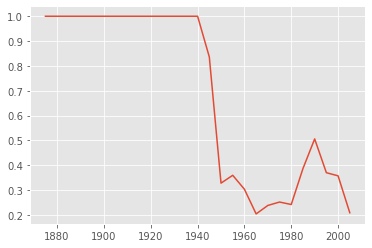

In [11]:
plt.plot(list(range(1875,2010,5)),Train_grouped_by_year.Remodeled_Binary)

In [12]:
Train_grouped_by_year.head(50)

,SalePrice,Dist_From_UoI,GrLivArea,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,BedroomAbvGr,FullBath,HalfBath,MSSubClass_>1-story,...,FenceBinary,Fireplaces,NoCentralAir,SchD_S,Neighborhood Cluster Label_2,Neighborhood Cluster Label_3,Neighborhood Cluster Label_4,Neighborhood Cluster Label_5,Remodeled_Year,Remodeled_Binary
YearBuiltBin,,,,,,,,,,,,,,,,,,,,,
"(1875, 1880]",174869.750000,2.790693,2330.000000,1274.500000,1055.500000,7.750000,4.000000,1.500000,0.250000,1.000000,...,0.250000,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.750000,1.000000
"(1880, 1885]",134000.000000,2.808368,1394.500000,981.500000,413.000000,7.000000,3.000000,1.000000,0.500000,0.500000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1990.500000,1.000000
"(1885, 1890]",156900.000000,2.922162,1968.333333,1153.000000,795.333333,7.333333,3.166667,1.666667,0.166667,1.000000,...,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.500000,1.000000
"(1890, 1895]",148000.000000,2.940437,1534.000000,751.000000,783.000000,6.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,1.000000
"(1895, 1900]",120780.000000,2.689194,1481.866667,868.000000,593.066667,7.066667,3.133333,1.400000,0.133333,1.000000,...,0.333333,0.066667,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,1982.666667,1.000000
"(1900, 1905]",129400.000000,2.430170,1540.000000,884.000000,656.000000,7.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,1.000000
"(1905, 1910]",121316.000000,2.825798,1356.894737,838.894737,518.000000,6.000000,2.789474,1.263158,0.210526,0.842105,...,0.315789,0.052632,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,1986.157895,1.000000
"(1910, 1915]",137426.761905,2.535873,1588.857143,889.619048,648.571429,7.000000,3.095238,1.285714,0.476190,0.904762,...,0.047619,0.380952,0.238095,0.000000,0.000000,0.000000,0.000000,0.000000,1972.238095,1.000000
"(1915, 1920]",135506.250000,2.771435,1400.000000,982.850000,406.250000,6.300000,2.925000,1.200000,0.150000,0.625000,...,0.275000,0.475000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1974.700000,1.000000


In [13]:
#choosing houses buiilt btw '50 and '00 bc about 30% remodeled 70% not

Housesfrom50to00=tdataTRAIN[(tdataTRAIN.YearBuilt>=1950)& (tdataTRAIN.YearBuilt<2000)]

In [14]:
RemodeledHousesfrom50to00=Housesfrom50to00[Housesfrom50to00.Remodeled_Binary==1]
NotRemodeledHousesfrom50to00=Housesfrom50to00[Housesfrom50to00.Remodeled_Binary!=1]

In [15]:
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()

In [16]:
regr1.fit(RemodeledHousesfrom50to00[['YearBuilt']],RemodeledHousesfrom50to00.SalePrice)
regr1.score(RemodeledHousesfrom50to00[['YearBuilt']],RemodeledHousesfrom50to00.SalePrice)
regr1.coef_
#regr.intercept_

array([1913.60357936])

In [17]:
regr2.fit(NotRemodeledHousesfrom50to00[['YearBuilt']],NotRemodeledHousesfrom50to00.SalePrice)
regr2.score(NotRemodeledHousesfrom50to00[['YearBuilt']],NotRemodeledHousesfrom50to00.SalePrice)
#regr.coef_
#regr.intercept_

0.29156377468576045

In [18]:
regr2.coef_*1950 +regr2.intercept_

array([117752.01391323])

Text(0, 0.5, 'Sale Price')

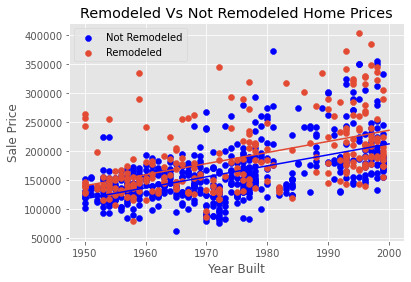

In [19]:
plt.scatter(NotRemodeledHousesfrom50to00.YearBuilt,NotRemodeledHousesfrom50to00.SalePrice,c='b',label='Not Remodeled')
plt.scatter(RemodeledHousesfrom50to00.YearBuilt,RemodeledHousesfrom50to00.SalePrice,label='Remodeled')
plt.legend()
x=np.linspace(1950,2000,100)
plt.plot(x,regr1.coef_*x +regr1.intercept_)
plt.plot(x,regr2.coef_*x +regr2.intercept_,c='b')
plt.title('Remodeled Vs Not Remodeled Home Prices')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
#graph(lambda x: regr1.coef_*x +regr1.intercept_, range(1950, 2000))

In [20]:
print(f'The Remodeled Houses SLR Equation is:\nSalePrice={"{:,}".format(round(list(regr1.intercept_+regr1.coef_*1950)[0],2))} + {"{:,}".format(round(regr1.coef_[0],2))} Year After 1950')

print(f'The Unremodeled Houses SLR Equation is:\nSalePrice={"{:,}".format(round(list(regr2.intercept_+regr2.coef_*1950)[0],2))} + {"{:,}".format(round(regr2.coef_[0],2))} Year After 1950')



The Remodeled Houses SLR Equation is:
SalePrice=140,060.3 + 1,913.6 Year After 1950
The Unremodeled Houses SLR Equation is:
SalePrice=117,752.01 + 1,892.37 Year After 1950


## Full lasso on the two to see if any interpretable difference

## ignore for now

In [21]:
NotRemodeledHousesfrom50to00Y=NotRemodeledHousesfrom50to00.SalePrice
NotRemodeledHousesfrom50to00=NotRemodeledHousesfrom50to00.iloc[:,1:]
RemodeledHousesfrom50to00Y=RemodeledHousesfrom50to00.SalePrice
RemodeledHousesfrom50to00=RemodeledHousesfrom50to00.iloc[:,1:]

In [22]:

colstokeep=['Dist_From_UoI', 'GrLivArea', '1stFlrSF', '2ndFlrSF',
       'TotRmsAbvGrd', 'BedroomAbvGr', 'FullBath', 'HalfBath',
       'MSSubClass_>1-story', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'LotArea',
       'LotShape_IR', 'SlopedLot', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Pos',
       'Condition1_RailRd', 'NonStdElectrical', 'MasVnrArea',
       'MasVnrType_BrkFace', 'MasVnrType_StoneBrkcom', 'RoofStyle_Hip',
       'RoofStyle_Other', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace',
       'Exterior1st_HdbdOther', 'Exterior1st_MetalSd',
       'Exterior1st_Stc_CemBd_WdSdSh', 'Foundation_BrkTil', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'YearBuilt',
       'OverallQual', 'OverallCondBinary', 'ExterQual_Ex', 'ExterQual_Fa',
       'ExterQual_Gd', 'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_Fa',
        'Functional_Min', 'Functional_Maj',
       'FireplaceQu_Ex', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'FireplaceQu_Fa',
       'FireplaceQu_Po', 'BsmtQual_None', 'BsmtCond_None', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinGdLvng', 'BsmtHalfBath', 'BsmtFullBath',
       'BsmtExposure', 'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtQual_Fa',
       'BsmtCond_Gd', 'BsmtCond_Fa', 'GarageType_Detchd', 'GarageType_None',
       'GarageFinish_None', 'GarageArea', 'GarageCars', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'UnpavedDrive', 'WoodDeckBinary', 'HasPorch',
       'FenceBinary', 'Fireplaces', 'NoCentralAir', 'SchD_S',
       'Neighborhood Cluster Label_2', 'Neighborhood Cluster Label_3',
       'Neighborhood Cluster Label_4', 'Neighborhood Cluster Label_5']
# colstokeep=['Dist_From_UoI', 'GrLivArea', '1stFlrSF', '2ndFlrSF',
#        'TotRmsAbvGrd', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'LotArea',
#       'YearBuilt',
#        'OverallQual',  'GarageArea', 'GarageCars',
#        'Neighborhood Cluster Label_2', 'Neighborhood Cluster Label_3',
#        'Neighborhood Cluster Label_4', 'Neighborhood Cluster Label_5']
NotRemodeledHousesfrom50to00=NotRemodeledHousesfrom50to00[colstokeep]
RemodeledHousesfrom50to00=RemodeledHousesfrom50to00[colstokeep]

In [23]:

scaler=StandardScaler()
scaler.fit(NotRemodeledHousesfrom50to00)
NotRemodeledHousesfrom50to00=scaler.transform(NotRemodeledHousesfrom50to00)
scaler=StandardScaler()
scaler.fit(RemodeledHousesfrom50to00)
RemodeledHousesfrom50to00=scaler.transform(RemodeledHousesfrom50to00)


In [24]:
cvlassoNOREMO=LassoCV( alphas=np.linspace(10,6000,1000), fit_intercept=True, normalize=False,cv=5)
cvlassoNOREMO.fit(NotRemodeledHousesfrom50to00,NotRemodeledHousesfrom50to00Y)

lassoNOREMO=Lasso(alpha=cvlassoNOREMO.alpha_, fit_intercept=True, normalize=False)

print(f'The selected alpha was {cvlassoNOREMO.alpha_} which gave r^2 of ')
print(cross_val_score(lassoNOREMO, NotRemodeledHousesfrom50to00,NotRemodeledHousesfrom50to00Y,  scoring='r2'))


The selected alpha was 10.0 which gave r^2 of 
[0.85015435 0.89307817 0.77764031 0.85078036 0.83458546]


In [25]:
cvlasso=LassoCV( alphas=np.linspace(10,6000,1000), fit_intercept=True, normalize=False,cv=5)
cvlasso.fit(RemodeledHousesfrom50to00,RemodeledHousesfrom50to00Y)

lasso=Lasso(alpha=cvlasso.alpha_, fit_intercept=True, normalize=False)

print(f'The selected alpha was {cvlasso.alpha_} which gave r^2 of ')
print(cross_val_score(lasso, RemodeledHousesfrom50to00,RemodeledHousesfrom50to00Y,  scoring='r2'))



The selected alpha was 93.94394394394394 which gave r^2 of 
[0.85780881 0.88825053 0.81248814 0.83492869 0.81701222]


/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5681789499.331833, tolerance: 81739975.4758481
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19713711982.63746, tolerance: 81739975.4758481
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88328051.11914062, tolerance: 81739975.4758481
  model = cd_fast.enet_coordinate_descent(


In [26]:
results=pd.DataFrame({'Attr':colstokeep,'Coef No Remo':cvlassoNOREMO.coef_,'Coef Remo':cvlasso.coef_})
results.head(50)

,Attr,Coef No Remo,Coef Remo
0,Dist_From_UoI,-1803.140027,-3256.109912
1,GrLivArea,25342.891338,15767.247022
2,1stFlrSF,8476.145119,17297.237451
3,2ndFlrSF,-0.000000,14686.719547
4,TotRmsAbvGrd,-2658.350835,-7693.495222
5,BedroomAbvGr,-3931.641075,-0.000000
6,FullBath,-1759.344399,-276.710676
7,HalfBath,-2705.520069,-2306.206666
8,LotArea,5301.835336,5512.639160
9,YearBuilt,12934.937972,6080.900056
